# point inside contour<hr>

In [1]:
import matplotlib.pyplot as plt

global variables:

In [2]:
BLACK = 0
WHITE = 255
MIN_SIZE = 3
MIN_INDEX = 0

Input validity checks.<br>
params {2-D binary array, number, number, number, number} image, point coordinates(x, y), dimensions(h, w)<br>
return {boolean} true if valid, else false.

In [3]:
def input_validation(image, p_x, p_y, h, w):
    if h < MIN_SIZE and w < MIN_SIZE and h != image.shape[0] and w != image.shape[1]:
        print("Image dimensions illegal.")
        return False
    if p_x < MIN_INDEX or p_x >= w or p_y < MIN_INDEX or p_y >= h:
        print("Coordinates P is outside the image borders.")
        return False
    return True

Draw a ray on the original image from the given point to one of the image borders.<br>
param {2-D binary array, list, number} image, ray 4 Coordinates, x coordinate of the given point

In [4]:
def draw_ray(image, ray, p_x):
    plt.plot(p_x, ray[1], 'ro')
    plt.hlines(ray[1], ray[0], ray[2], 'r')
    plt.imshow(image, cmap='gray')
    plt.show()

pass over edge (if the current position on the ray is on edge).<br>
params {2-D binary array, number, number} image, point y coordinate, current position<br>
return {number} position of the end of the edge.

In [5]:
def pass_on_edge(image, p_y, i):
    j = i + 1
    while image[p_y, j] == BLACK:
        j += 1
    j -= 1
    return j

check for exceptions/extreme scenarios - vertex or specifics horizontal edge.<br>
params {2-D binary array, number, number, boolean} image, point_y , current position, vertex flag<br>
return {boolean} if exceptions/extreme scenario - true, else false.<br>
***this function designed for pass with the ray on the image width.***

In [6]:
def vertex_or_horizontal_edge(image, p_y, i, vertex_flag):
    if image[p_y - 1, i] == BLACK and image[p_y - 1, i + 2] == BLACK:  # V -> lower vertex (neighbors: N.W, N.E)
        vertex_flag = True
    elif image[p_y + 1, i] == BLACK and image[p_y + 1, i + 2] == BLACK:  # ^ -> upper vertex (neighbors: S.W, S.E)
        vertex_flag = True
    elif image[p_y, i + 2] == BLACK and (
            image[p_y - 1, i + 1] == BLACK or image[p_y - 1, i] == BLACK):  # low_horizontal_edge_vertex
        j = pass_on_edge(image, p_y, i)
        if image[p_y - 1, j] == BLACK or image[p_y - 1, j + 1] == BLACK:  # -> neighbors: N/N.W, N/N.E
            vertex_flag = True
    elif image[p_y, i + 2] == BLACK and (
            image[p_y + 1, i + 1] == BLACK or image[p_y + 1, i] == BLACK):  # up_horizontal_edge_vertex
        j = pass_on_edge(image, p_y, i)
        if image[p_y + 1, j] == BLACK or image[p_y + 1, j + 1] == BLACK:  # -> neighbors: S/S.W, S/S.E
            vertex_flag = True
    return vertex_flag

check if a given point is inside a given contour. <br>
params {2-D binary array, number, number, number, number} image, point coordinates(x, y), dimensions(h, w) <br>
return {boolean} true - if inside, else - false

In [7]:
def check_if_inside(image, point, dim):
    p_x, p_y = point
    h, w = dim
    if not input_validation(image, p_x, p_y, h, w):
        return -1
    inside = False
    min_x = min(p_x, (w-1)-p_x)  # check the shortest direction of the ray
    if min_x == (w-1)-p_x:  # right
        ray = (p_x, p_y, (w-1), p_y)
    else: # left            
        ray = (0, p_y, p_x, p_y)
    draw_ray(image, ray, p_x)
    if image[p_y, p_x] == BLACK:  # if the point on the contour
        print("point", point, "on the contour")
        return inside
    count = 0
    vertex_flag = False  # check if we were on horizontal edge or vertex for counter
    for i in range(ray[0], ray[2]):
        # contour crossing + Check that the current pixel is not on the rightmost pixel in the image
        if image[p_y, i] != image[p_y, i+1]: 
            if i+2 < w and image[p_y, i] == WHITE:
                # check neighbors to determine if the current pixel edge or vertex - exceptions/extreme scenarios
                # if one of the flags true --> not count contour crossing
                vertex_flag = vertex_or_horizontal_edge(image, p_y, i, vertex_flag)
            # if contour is on the rightmost/ leftmost pixel in the image
            elif (i+2 >= w and image[p_y, i] == WHITE) or (i==0 and image[p_y, i] == BLACK):
                count += 0.5
            if not vertex_flag:   # if not exception/extreme scenario --> count contour crossing.
                count += 0.5
            if image[p_y, i] == BLACK:  # if we at the end of the edge/ vertex (turn off extreme scenario).
                vertex_flag = False
    #  even-odd check
    if count % 2 == 0:
        print("point", point, "outside the contour")
        inside = False
    else:
        print("point", point, "inside the contour")
        inside = True
    return inside

# Testing code

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio

test #1 create image with 100X150 rectangle

In [9]:
a = np.zeros((200, 200), np.uint8)
cv2.rectangle(a, (50,25), (150,175), 255, thickness=1, lineType=8, shift=0)
a = np.invert(a)

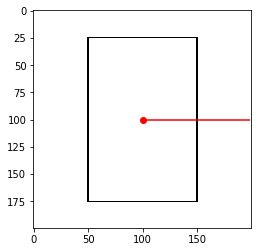

point (100, 100) inside the contour
True


In [10]:
print(check_if_inside(a, (100, 100), a.shape))

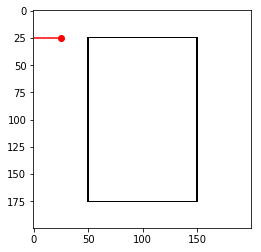

point (25, 25) outside the contour
False


In [11]:
print(check_if_inside(a, (25, 25), a.shape))

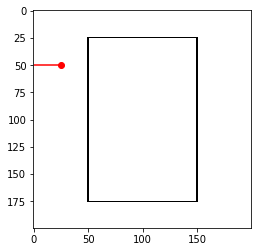

point (25, 50) outside the contour
False


In [12]:
print(check_if_inside(a, (25, 50), a.shape))

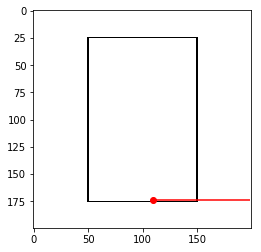

point (110, 174) inside the contour
True


In [13]:
print(check_if_inside(a, (110, 174), a.shape))

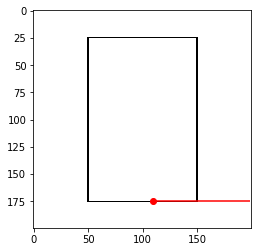

point (110, 175) on the contour
False


In [14]:
print(check_if_inside(a, (110, 175), a.shape))

test #2

In [15]:
b = np.zeros((200, 160), np.uint8)
b[25:90, 50:150] = 255
b[25:175, 50:80] = 255
b[25:175, 120:150] = 255
b[26:89, 51:149] = 0
b[26:174, 51:79] = 0
b[26:174, 121:149] = 0
b = np.invert(b)

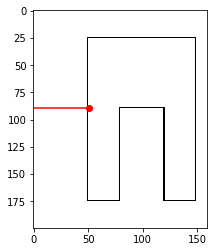

point (51, 89) inside the contour
True


In [16]:
print(check_if_inside(b, (51, 89), b.shape))

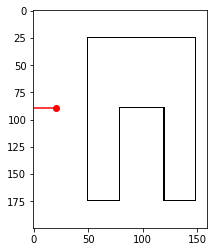

point (20, 89) outside the contour
False


In [17]:
print(check_if_inside(b, (20, 89), b.shape))

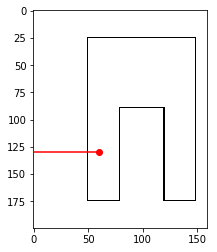

point (60, 130) inside the contour
True


In [18]:
print(check_if_inside(b, (60, 130), b.shape))

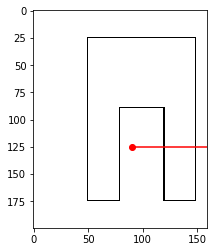

point (90, 125) outside the contour
False


In [19]:
print(check_if_inside(b, (90, 125), b.shape))

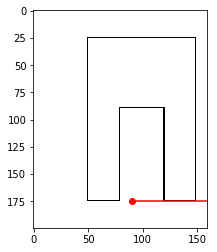

point (90, 175) outside the contour
False


In [20]:
print(check_if_inside(b, (90, 175), b.shape))

test #3

In [21]:
c = np.zeros((5, 5), np.uint8)
c[1:4,1:4]=255
c[2,2]=0
c=np.invert(c)

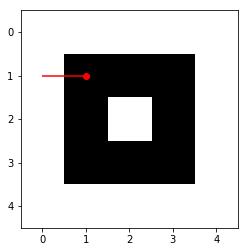

point (1, 1) on the contour
False


In [22]:
print(check_if_inside(c, (1, 1), c.shape))

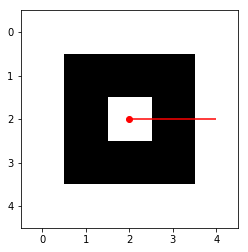

point (2, 2) inside the contour
True


In [23]:
print(check_if_inside(c, (2, 2), c.shape))

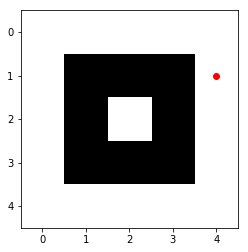

point (4, 1) outside the contour
False


In [24]:
print(check_if_inside(c, (4, 1), c.shape))

In [25]:
print(check_if_inside(c, (5, 2), c.shape))

Coordinates P is outside the image borders.
-1


test #4

In [26]:
d = np.zeros((3, 3), np.uint8)
d[1,1]=255

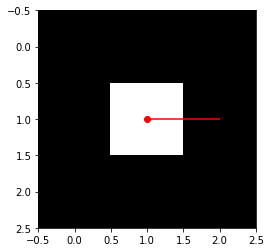

point (1, 1) inside the contour
True


In [27]:
print(check_if_inside(d, (1, 1), d.shape))

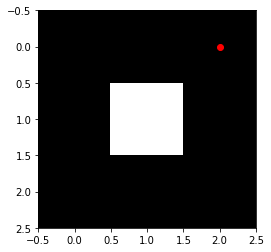

point (2, 0) on the contour
False


In [28]:
print(check_if_inside(d, (2, 0), d.shape))

test #5

In [29]:
d = np.zeros((10, 10), np.uint8)
d[1:9,1:9]=255
d[9,1]=255
d[8,1]=0
d[8:10,0]=255
d[8, 4:6]=0
d[9, 4:6]=255

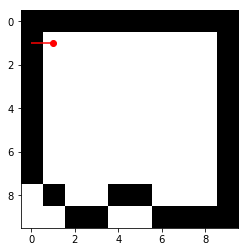

point (1, 1) inside the contour
True


In [30]:
print(check_if_inside(d, (1, 1), d.shape))

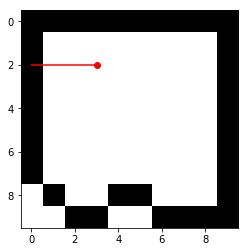

point (3, 2) inside the contour
True


In [31]:
print(check_if_inside(d, (3, 2), d.shape))

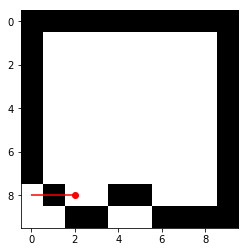

point (2, 8) inside the contour
True


In [32]:
print(check_if_inside(d, (2, 8), d.shape))

test #6 circle

In [33]:
cir = np.zeros((100,100), np.uint8)
cv2.circle(cir, (40, 50), 25, 255, thickness=1, lineType=8, shift=0)
cir = np.invert(cir)
plt.rcParams["figure.figsize"] = (10,10)

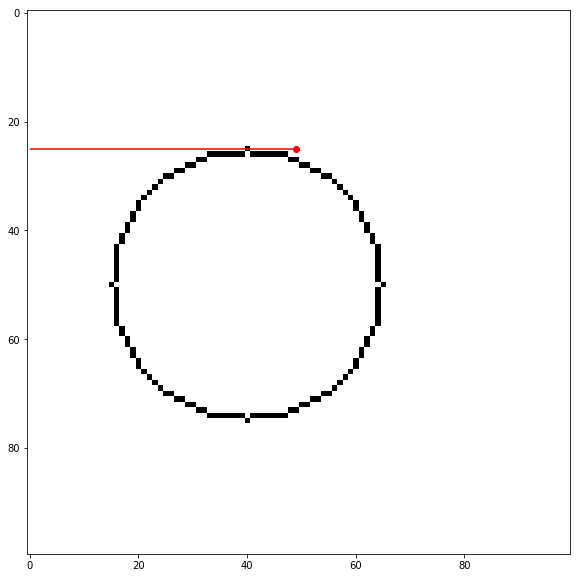

point (49, 25) outside the contour
False


In [34]:
print(check_if_inside(cir, (49, 25), cir.shape))

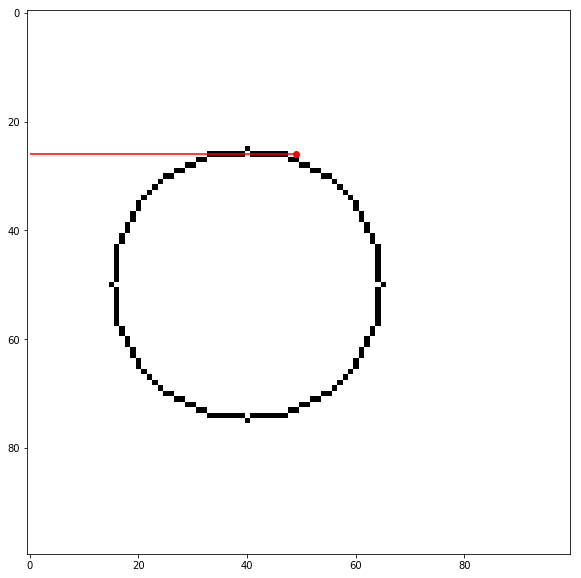

point (49, 26) outside the contour
False


In [35]:
print(check_if_inside(cir, (49, 26), cir.shape))

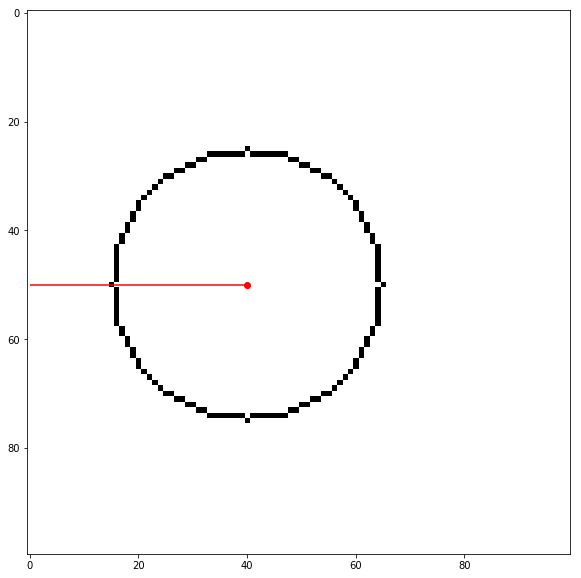

point (40, 50) inside the contour
True


In [36]:
print(check_if_inside(cir, (40, 50), cir.shape))

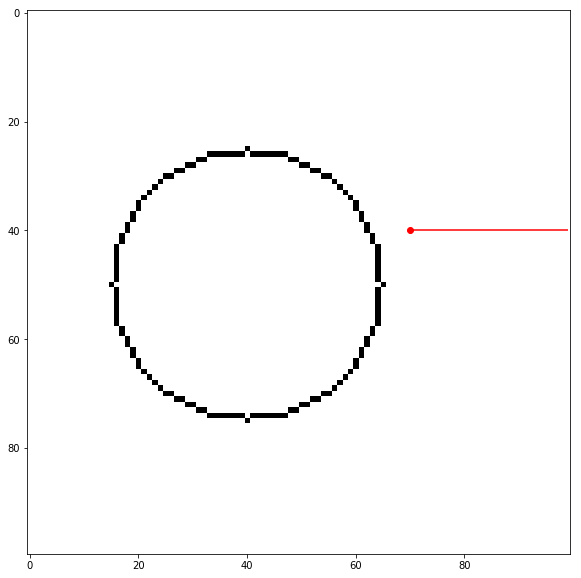

point (70, 40) outside the contour
False


In [37]:
print(check_if_inside(cir, (70, 40), cir.shape))

test #7 hand

In [38]:
im = imageio.imread('hand.png')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
hand = np.zeros(imgray.shape, np.uint8)
contours, hierarchy = cv2.findContours(imgray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
c = max(contours, key=cv2.contourArea)
cv2.drawContours(hand, [c], -1, (255,255,255), 1)
hand = np.invert(hand)

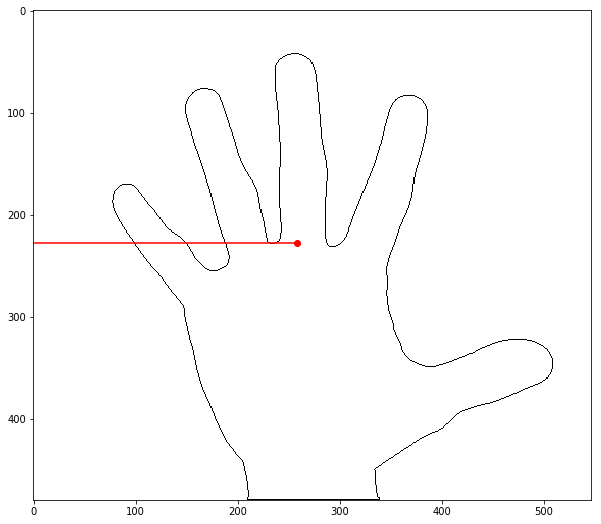

point (258, 228) inside the contour
True


In [39]:
print(check_if_inside(hand, (258, 228), hand.shape))

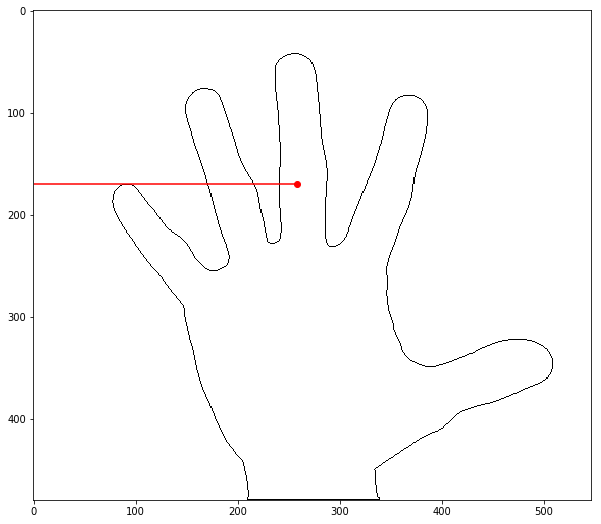

point (258, 170) inside the contour
True


In [40]:
print(check_if_inside(hand, (258, 170), hand.shape))

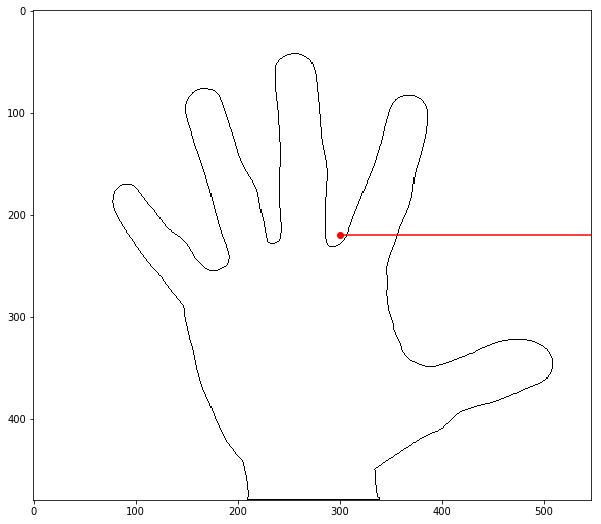

point (300, 220) outside the contour
False


In [41]:
print(check_if_inside(hand, (300, 220), hand.shape))

### outside - on - inside the contour:
change only the x coordinate of the point. (each time add 1).

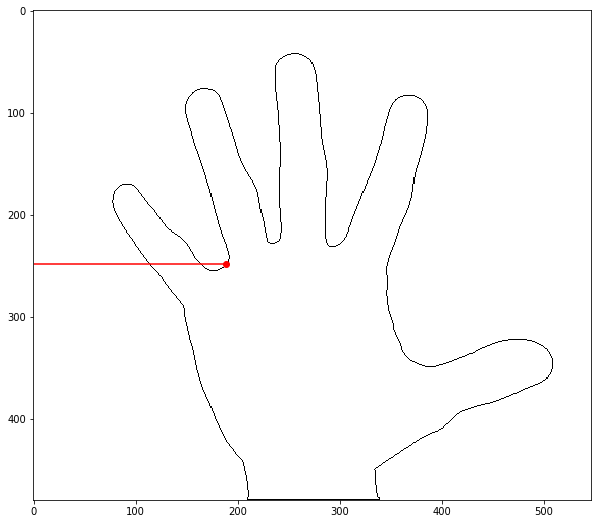

point (189, 248) outside the contour
False


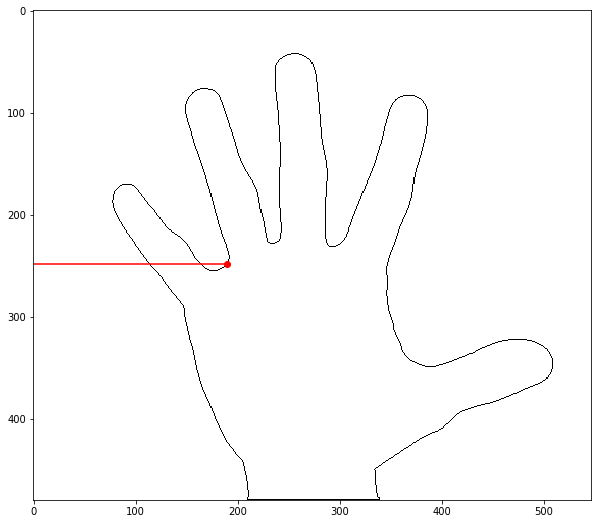

point (190, 248) on the contour
False


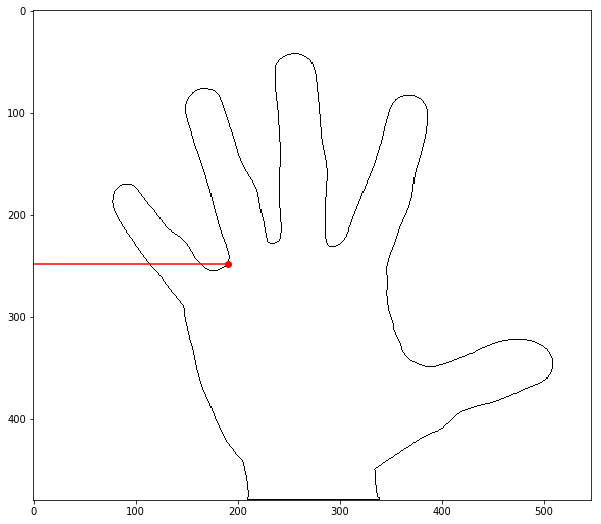

point (191, 248) inside the contour
True


In [42]:
print(check_if_inside(hand, (189, 248), hand.shape))
print(check_if_inside(hand, (190, 248), hand.shape))
print(check_if_inside(hand, (191, 248), hand.shape))